    PyTorch에서의 Gradient Descent에 대해서 간단하게 먼저 살펴본다
    파이토치를 이용해서 선형회귀 모델을 먼저 만들고,
    경사하강법으로 학습하는 과정을 코드로 작성해 보면서
    지금까지 PDF로 이해한 내용을 마무리 하겠다.
    
    파이토치는 데이터의 기본 단위로 텐서(Tensor)를 사용한다
    텐서는 넘파이에서의 array()와 함수와 동일하다.
    np.array()함수와 동일하다.

In [1]:
import tensorflow as tf
import keras as k
import torch # 파이토치 프레임워크를 불러온다.
import torchvision # 파이토치 내에서도 vision에 해당하는 모델로서, 이미지 Processing에 특화된 모듈을 말한다.
import torch.nn as nn
import torchvision.transforms as trainsforms # 데이터 Augmentation에 사용될 모듈이다. 데이터 변형...

print("텐서플로우 버전 = ", tf.__version__)
print("케라스 버전 = ", k.__version__)
print("토치 버전 = ", torch.__version__)

텐서플로우 버전 =  2.4.1
케라스 버전 =  2.4.3
토치 버전 =  1.7.1


# 1. Forward Propagation

### NN Model Generator

In [2]:
x = torch.randn(10, 3) # 10x3, 10은 Banchsize 즉, bias를 말한다. >> 즉 3x1 인경우이고,
y = torch.randn(10, 2) # 10x2 10을 제외한 값 2x1이 된다.
# w는 3행 2열이 나와야한다.

In [3]:
x

tensor([[-1.0159,  0.9287, -1.2674],
        [ 0.3282,  0.3323,  1.1789],
        [-0.2381, -0.1905, -0.6045],
        [-0.2793,  0.1005,  1.8401],
        [-1.2032, -1.5852,  1.1145],
        [-1.1909, -0.0457, -1.5412],
        [-0.6056, -0.4156,  1.9759],
        [-0.8912,  0.9902, -1.2583],
        [ 0.7726, -0.5896,  0.2925],
        [-0.2948,  1.9912,  0.5628]])

In [4]:
y

tensor([[ 1.5831, -1.0138],
        [-1.0054,  0.4612],
        [-1.5352, -0.5860],
        [-0.8843,  0.5657],
        [-0.4909, -2.1701],
        [-0.6507,  0.1155],
        [-0.5916, -1.8702],
        [ 1.7749, -0.6669],
        [ 0.1128,  0.4471],
        [ 0.1158, -2.0842]])

In [5]:
linear = nn.Linear(3,2) # 모델을 만들었다.

In [6]:
print(linear.weight) # linear에서 Transpose시켜서 나오기 때문에 행과 열이 뒤바껴서 나온다.
# 3행 2열이어야 하는데 2행 3열로나옴.

Parameter containing:
tensor([[-0.2765, -0.3676, -0.1256],
        [-0.5119,  0.0060, -0.5519]], requires_grad=True)


In [7]:
print(linear.bias) # 10은 공통의 값이라서 생략되어서 출력된것이다.

Parameter containing:
tensor([-0.1022, -0.3396], requires_grad=True)


### 선정의 - loss Function , optimization으로 어떤걸 사용할지 정한다.

In [8]:
'''
linear.parameters()을 출력하면 객체가나오는데 학습의 주체를 해킹하고 있는 객체를 말한다.
parameters() 학습의 주체를 해킹하는 함수
w,b를 해킹 하고 있음.
그래서 linear.parameters()를 그대로 넣으면 됨.
'''
linear.parameters()

<generator object Module.parameters at 0x0000020792F76970>

In [9]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # 학습하는 주체는 w,b가 된다., learning rate를 넣는다.

### 모델에 입력값을 넣고, 모델이 예측한 값을 출력한다

In [10]:
pred = linear(x)

### loss값을 구한다.

In [11]:
loss = loss_function(pred, y) # 예측값과 답지를 넣음

In [12]:
print('Loss before step BackPropagation : ', loss)

Loss before step BackPropagation :  tensor(1.7183, grad_fn=<MseLossBackward>)


##### 텐서의 단위로 나옴.. 1.5548의 로우값이 나옴

In [13]:
print('Loss before step BackPropagation : ', loss.item())

Loss before step BackPropagation :  1.7182563543319702


##### 로우값만 나옴
 : 1.5547583103179932

# 2. Back ProPagation

##### dL/dW

In [14]:
loss.backward() # 편미분이 돌아감 Loss값에 따른 w,b값의 미분한값 아직 학습진행은 안됨.

C:\anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


In [15]:
print('dL/dW : ', linear.weight.grad)
print('dL/db : ', linear.bias.grad)

dL/dW :  tensor([[-0.0082, -0.7217,  0.5184],
        [-0.8806,  0.3112, -0.7412]])
dL/db :  tensor([0.0982, 0.4513])


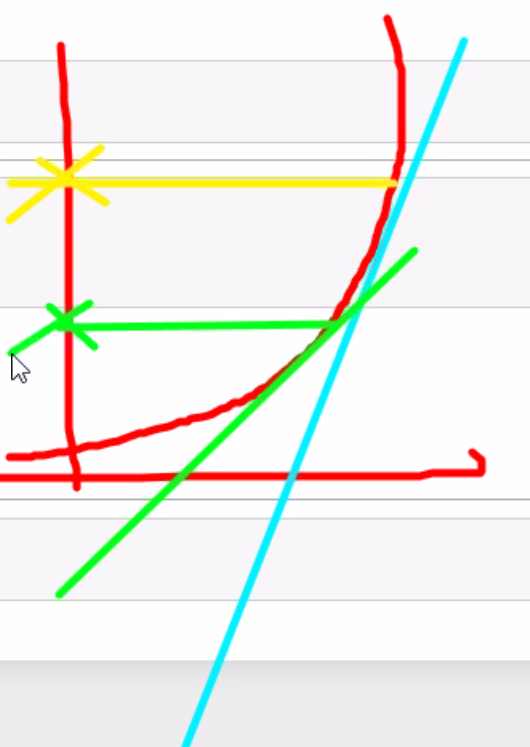
위처럼 w, b값이 바뀌었다 한번 확인해보자

In [16]:
# 이때 위에서 변경된 값으로 하강을 진행한다.
optimizer.step()

In [17]:
# 반복 효과
pred = linear(x)

In [18]:
loss= loss_function(pred, y)

In [19]:
print(loss.item())

1.6941839456558228
